# 0. "선형" 이란?

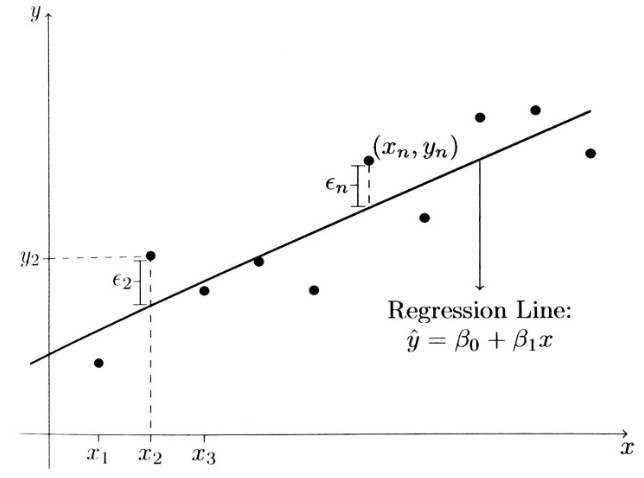

In [ ]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD

import numpy as np

print(tf.__version__)

2.8.2


# 1. 선형 모델 간편 구현

In [ ]:
# 데이터셋 임의 생성
# y = 2x + 1
# 독립변수(x)로 종속변수(y)를 예측하는 것을 의미
x_data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y_data = np.array([3, 5, 7, 9, 11, 13, 15, 17, 19, 21])  

In [ ]:
# 모델 (model) 구축

model = Sequential()    # 모델

model.add(Flatten(input_shape=(1,)))       # 입력층

model.add(Dense(1, activation='linear'))   # 출력층

# model.add(Dense(1, input_shape=(1,), activation='linear'))  # 입력층 + 출력층

In [ ]:
#model.add(Dense(1, input_shape=(1,), activation='linear'))  # 입력층 + 출력층

In [ ]:
# [3] 모델 (model) 컴파일 및 summary

model.compile(optimizer=SGD(learning_rate=1e-2), loss='mse')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1)                 0         
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hist = model.fit(x_data, y_data, epochs=500)

Epoch 1/500
1/1 [==============================] - 0s 11ms/step - loss: 0.0662
Epoch 2/500
1/1 [==============================] - 0s 6ms/step - loss: 0.0656
Epoch 3/500
1/1 [==============================] - 0s 5ms/step - loss: 0.0651
Epoch 4/500
1/1 [==============================] - 0s 5ms/step - loss: 0.0645
Epoch 5/500
1/1 [==============================] - 0s 5ms/step - loss: 0.0640
Epoch 6/500
1/1 [==============================] - 0s 6ms/step - loss: 0.0634
Epoch 7/500
1/1 [==============================] - 0s 6ms/step - loss: 0.0629
Epoch 8/500
1/1 [==============================] - 0s 6ms/step - loss: 0.0624
Epoch 9/500
1/1 [==============================] - 0s 6ms/step - loss: 0.0619
Epoch 10/500
1/1 [==============================] - 0s 6ms/step - loss: 0.0613
Epoch 11/500
1/1 [==============================] - 0s 6ms/step - loss: 0.0608
Epoch 12/500
1/1 [==============================] - 0s 6ms/step - loss: 0.0603
Epoch 13/500
1/1 [==============================] - 0s 6ms/s

In [ ]:
# [5] 모델 (model) 사용

result = model.predict(np.array([10, 9, 8, 7, 6, 5, 4, 3, 2, 1]))

print(result)
#print(result.round())

[[21.029572 ]
 [19.019838 ]
 [17.010105 ]
 [15.000372 ]
 [12.990639 ]
 [10.9809065]
 [ 8.971173 ]
 [ 6.96144  ]
 [ 4.9517074]
 [ 2.9419744]]


In [ ]:
result = model.predict(np.array([21, 19, 17, 15, 13, 11, 9, 7, 5, 3, 1]))

print(result)     

[[43.136635 ]
 [39.117165 ]
 [35.097702 ]
 [31.078236 ]
 [27.05877  ]
 [23.039305 ]
 [19.019838 ]
 [15.000372 ]
 [10.9809065]
 [ 6.96144  ]
 [ 2.9419744]]


# 2. 선형 모델 직접 구현

In [ ]:
# 데이터셋 임의 생성
# y = 2x+ 1
x_data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y_data = np.array([3, 5, 7, 9, 11, 13, 15, 17, 19, 21])  

In [ ]:
rng = np.random
# Parameters.
learning_rate = 0.1
training_steps = 500
display_step = 5

In [ ]:
# Weight and Bias, initialized randomly.
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Linear regression (Wx + b).
def linear_regression(x):
    return W * x + b

# Mean square error.
def mean_square(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

# Stochastic Gradient Descent Optimizer.
optimizer = tf.optimizers.SGD(learning_rate)

In [ ]:
print(W,b)

<tf.Variable 'weight:0' shape=() dtype=float32, numpy=-0.9131153> <tf.Variable 'bias:0' shape=() dtype=float32, numpy=-1.830036>


In [ ]:
# Optimization process. 
def run_optimization():
    # Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g:
        pred = linear_regression(x_data)
        loss = mean_square(pred, y_data)

    # Compute gradients.
    gradients = g.gradient(loss, [W, b])
    
    # Update W and b following gradients.
    optimizer.apply_gradients(zip(gradients, [W, b]))

In [ ]:
# Run training for the given number of steps.
for step in range(1, training_steps + 1):
    # Run the optimization to update W and b values.
    run_optimization()
    
    if step % display_step == 0:
        pred = linear_regression(x_data)
        loss = mean_square(pred, y_data)
        print("step: %i, loss: %f, W: %f, b: %f" % (step, loss, W.numpy(), b.numpy()))

step: 5, loss: 0.494423, W: 2.218175, b: -0.518899
step: 10, loss: 0.474048, W: 2.213633, b: -0.487272
step: 15, loss: 0.454512, W: 2.209184, b: -0.456304
step: 20, loss: 0.435781, W: 2.204829, b: -0.425981
step: 25, loss: 0.417822, W: 2.200564, b: -0.396289
step: 30, loss: 0.400604, W: 2.196388, b: -0.367216
step: 35, loss: 0.384095, W: 2.192298, b: -0.338747
step: 40, loss: 0.368266, W: 2.188294, b: -0.310872
step: 45, loss: 0.353089, W: 2.184374, b: -0.283577
step: 50, loss: 0.338538, W: 2.180535, b: -0.256850
step: 55, loss: 0.324587, W: 2.176775, b: -0.230680
step: 60, loss: 0.311210, W: 2.173095, b: -0.205054
step: 65, loss: 0.298386, W: 2.169490, b: -0.179963
step: 70, loss: 0.286089, W: 2.165962, b: -0.155393
step: 75, loss: 0.274299, W: 2.162506, b: -0.131336
step: 80, loss: 0.262995, W: 2.159122, b: -0.107779
step: 85, loss: 0.252157, W: 2.155809, b: -0.084713
step: 90, loss: 0.241765, W: 2.152565, b: -0.062127
step: 95, loss: 0.231802, W: 2.149388, b: -0.040011
step: 100, lo

In [ ]:
import matplotlib.pyplot as plt

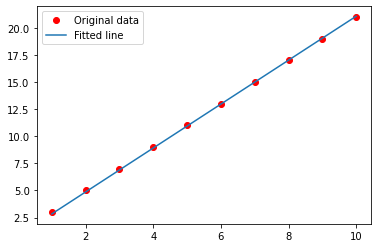

In [ ]:
# Graphic display
plt.plot(x_data, y_data, 'ro', label='Original data')
plt.plot(x_data, np.array(W * x_data + b), label='Fitted line')
plt.legend()
plt.show()